<h1> Classifier using Support Vector Machines (SVMs). by Diego-Ossa</h1>

Support Vector Machines (SVMs) are a class of supervised learning algorithms used for classification and regression tasks. SVMs excel in high-dimensional spaces and are adept at finding the optimal hyperplane that best separates different classes.
In this presentation, we will explore their application in image classification, including a dataset created in previous works.


# **DATASET Fashion MNIST**

The given code block does two things: Installs the kaggle package using pip. The -q flag makes the installation process quiet, meaning it won't display detailed output. Imports the files module from google.colab to upload files.

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aristidesjaramillo","key":"b1c20058f9e0d084e9933cba9a04de74"}'}

The given command upgrades the kaggle package using pip. The --upgrade flag ensures that the latest version of the package is installed.

In [ ]:
!pip install --upgrade kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=2e3d9b04ccc7f1865a621924252c9237595505bdf303b0092bf1498567c4cada
  Stored in directory: /root/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


The provided commands do the following:

Creates a .kaggle directory in the user's home directory, copies the kaggle.json file to the .kaggle directory. This file contains your Kaggle API credentials, sets the permissions of kaggle.json to 600, which means only the owner can read and write to the file, lists the available datasets on Kaggle using the kaggle datasets list command.

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                             title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                             Online Food Dataset                               3KB  2024-03-02 18:50:30          27544        535  0.9411765        
mexwell/heart-disease-dataset                                   🫀 Heart Disease Dataset                         399KB  2024-04-08 09:43:49            910         25  1.0              
rahulvyasm/netflix-movies-and-tv-shows                          Netflix Movies and TV Shows                       1MB  2024-04-10 09:48:38           1533         27  1.0              
nbroad/gemma-rewrite-nbroad                                     gemma-rewrite-nb

Downloads the dataset named fashionmnist from Kaggle using the kaggle datasets download command, unzips the downloaded fashionmnist.zip file and extracts its contents into a directory named fashionmnist.

In [ ]:
!kaggle datasets download -d zalando-research/fashionmnist
!unzip fashionmnist.zip -d fashionmnist

Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist
License(s): other
 80% 55.0M/68.8M [00:00<00:00, 196MB/s]
100% 68.8M/68.8M [00:00<00:00, 196MB/s]
Archive:  fashionmnist.zip
  inflating: fashionmnist/fashion-mnist_test.csv  
  inflating: fashionmnist/fashion-mnist_train.csv  
  inflating: fashionmnist/t10k-images-idx3-ubyte  
  inflating: fashionmnist/t10k-labels-idx1-ubyte  
  inflating: fashionmnist/train-images-idx3-ubyte  
  inflating: fashionmnist/train-labels-idx1-ubyte  


# **Binary Classification**


The provided code imports the pandas library with the alias pd. It then loads the fashion-mnist_test.csv dataset from the fashionmnist directory into a DataFrame named df. Finally, it prints the shape of the DataFrame df using df.shape.

In [ ]:
import pandas as pd
# Cargar el dataset
df = pd.read_csv("fashionmnist/fashion-mnist_test.csv")
df.shape

(10000, 785)

The code imports several libraries and modules: numpy for numerical operations under the alias np, pandas for data manipulation and analysis under the alias pd, matplotlib.pyplot for data visualization as plt, SVC from sklearn.svm for Support Vector Classification, train_test_split from sklearn.model_selection for splitting the dataset into training and testing sets, classification_report from sklearn.metrics for evaluating classification performance, PCA from sklearn.decomposition for Principal Component Analysis, a dimensionality reduction technique, and ListedColormap from matplotlib.colors for creating custom colormaps.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

The code filters the DataFrame df to include only rows where the 'label' column has values of 0 or 2. The filtered DataFrame is stored in df_filtered. Then, it saves this filtered DataFrame to a new CSV file named 'binary.csv' without including the index column.

In [ ]:
df_filtered = df[df['label'].isin([0, 2])]

archivo_nuevo = 'binary.csv'
df_filtered.to_csv(archivo_nuevo, index=False)

The code loads the data from the 'binary.csv' file into a new DataFrame named df_data. After loading the data, it prints the shape (number of rows and columns) of the DataFrame df_data using df_data.shape.

In [ ]:
df_data = pd.read_csv("binary.csv")
df_data.shape

(2000, 785)

The code sets a variable num to 250. It then creates two sampled DataFrames, df_sample_label_0 and df_sample_label_2, by sampling 250 rows each from df_data where the 'label' column has values 0 and 2, respectively. The sampling is done with a random state of 42 for reproducibility.

After sampling, it concatenates these two DataFrames to create df_test, which will be used for testing.

df_train is created by removing the indices of df_test from df_data, leaving the remaining data for training.

Finally, it prints the shapes of df_test and df_train to verify the sizes of the testing and training sets.

In [ ]:
num = 250

df_sample_label_0 = df_data[df_data['label'] == 0].sample(n=num, random_state=42)
df_sample_label_2 = df_data[df_data['label'] == 2].sample(n=num, random_state=42)

df_test = pd.concat([df_sample_label_0, df_sample_label_2])

df_train = df_data.drop(df_test.index)

print(df_test.shape)
print(df_train.shape)

(500, 785)
(1500, 785)


The code prepares the data for training and testing:

From the training dataset df_train, it selects the features (X_train) by dropping the 'label' column and extracts the labels (y_train).
Similarly, from the testing dataset df_test, it selects the features (X_test) and labels (y_test).
Then, it initializes a Support Vector Classifier (SVC) model with a linear kernel, regularization parameter C=1.0, and polynomial degree degree=2.

The model is trained using the training data (X_train and y_train) with the fit() method.

After training, the model predicts labels for the test features (X_test) using the predict() method and stores them in y_pred.

Finally, it prints a classification report to evaluate the performance of the model on the test data.

In [ ]:
# Seleccionar las características (X) y las etiquetas (y) del conjunto de entrenamiento
X_train = df_train.drop('label', axis=1).values
y_train = df_train['label'].values

# Seleccionar las características (X) y las etiquetas (y) del conjunto de prueba
X_test = df_test.drop('label', axis=1).values
y_test = df_test['label'].values

# Inicializar y entrenar el modelo LinearSVC
model = SVC(kernel='linear', C=1.0, degree=2)
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       250
           2       0.95      0.93      0.94       250

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



The code applies Principal Component Analysis (PCA) to reduce the dimensionality of the training and testing data:

It initializes a PCA object with n_components=2 to reduce the data to 2 principal components.
The training features X_train are transformed using PCA to create X_train_pca.
Similarly, the testing features X_test are transformed to create X_test_pca.
A new SVC model with a linear kernel, regularization parameter C=5.0, and polynomial degree degree=2 is initialized.

The model is trained using the reduced-dimensional training data (X_train_pca and y_train) with the fit() method.

After training, the model predicts labels for the reduced-dimensional test features (X_test_pca) using the predict() method and stores them in y_pred.

Finally, it prints a classification report to evaluate the performance of the model on the reduced-dimensional test data.

In [ ]:
# Aplicar PCA para reducir la dimensionalidad de los datos de entrenamiento
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Aplicar PCA para reducir la dimensionalidad de los datos de prueba
X_test_pca = pca.transform(X_test)

# Inicializar y entrenar el modelo SVM en el espacio de características reducido por PCA
model = SVC(kernel='linear', C=5.0, degree=2)
model.fit(X_train_pca, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       250
           2       0.94      0.96      0.95       250

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



The code visualizes the decision boundary of the trained SVM model in the PCA-reduced feature space:

It imports DecisionBoundaryDisplay from sklearn.inspection.
It creates a scatter plot of the PCA-transformed features, where each class is represented by a different color.
The decision boundary of the SVM model is plotted using the DecisionBoundaryDisplay.from_estimator() method with the plot_method="contourf", which visualizes decision boundaries as filled contours.
Support vectors are highlighted on the plot by overlaying them with larger markers.
The plot also includes axis labels, a title, and a legend to provide context to the visualization.

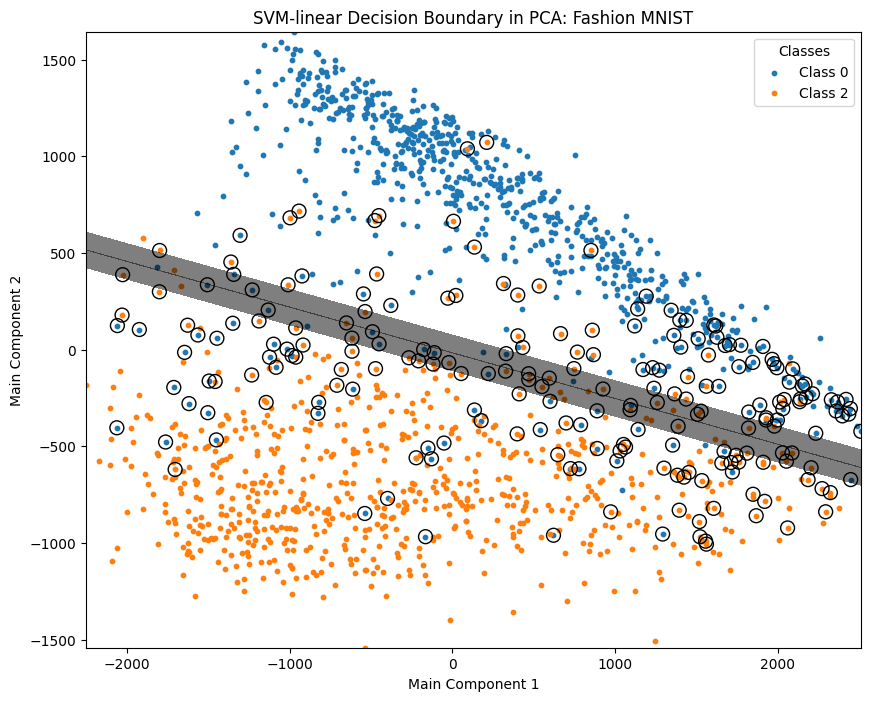

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

unique_classes = set(y_train)
plt.figure(figsize=(10, 8))

for label in unique_classes:
    class_indices = (y_train == label)
    plt.scatter(X_train_pca[class_indices, 0], X_train_pca[class_indices, 1], label=f'Class {label}', s=10)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    model,
    X_train_pca,
    plot_method="contourf",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.xlabel('Main Component 1')
plt.ylabel('Main Component 2')
plt.title('SVM-linear Decision Boundary in PCA: Fashion MNIST')
plt.legend(title='Classes')
plt.show()

The code applies Principal Component Analysis (PCA) to reduce the dimensionality of the training and testing data:

It initializes a PCA object with n_components=2 to reduce the data to 2 principal components.
The training features X_train are transformed using PCA to create X_train_pca.
Similarly, the testing features X_test are transformed to create X_test_pca.
A new Support Vector Machine (SVM) model with a polynomial kernel, regularization parameter C=100.0, and polynomial degree degree=3 is initialized.

The model is trained using the reduced-dimensional training data (X_train_pca and y_train) with the fit() method.

After training, the model predicts labels for the reduced-dimensional test features (X_test_pca) using the predict() method and stores them in y_pred.

Finally, it prints a classification report to evaluate the performance of the model on the reduced-dimensional test data.

In [ ]:
# Aplicar PCA para reducir la dimensionalidad de los datos de entrenamiento
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Aplicar PCA para reducir la dimensionalidad de los datos de prueba
X_test_pca = pca.transform(X_test)

# Inicializar y entrenar el modelo SVM en el espacio de características reducido por PCA
model = SVC(kernel='poly', C=100.0, degree=3)
model.fit(X_train_pca, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       250
           2       0.91      0.98      0.95       250

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



The code visualizes the decision boundary of the trained SVM model with a polynomial kernel in the PCA-reduced feature space:

It imports DecisionBoundaryDisplay from sklearn.inspection.
It creates a scatter plot of the PCA-transformed features, where each class is represented by a different color.
The decision boundary of the SVM model is plotted using the DecisionBoundaryDisplay.from_estimator() method with plot_method="contourf", which visualizes decision boundaries as filled contours.
Support vectors are highlighted on the plot by overlaying them with larger markers.
The plot also includes axis labels, a title, and a legend to provide context to the visualization.

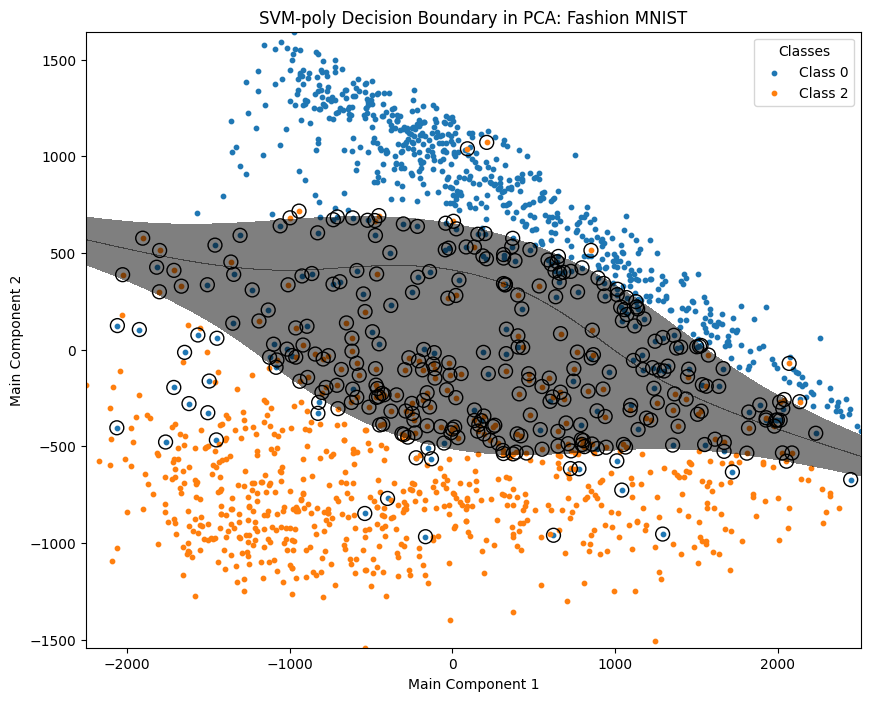

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

unique_classes = set(y_train)
plt.figure(figsize=(10, 8))

for label in unique_classes:
    class_indices = (y_train == label)
    plt.scatter(X_train_pca[class_indices, 0], X_train_pca[class_indices, 1], label=f'Class {label}', s=10)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    model,
    X_train_pca,
    plot_method="contourf",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.xlabel('Main Component 1')
plt.ylabel('Main Component 2')
plt.title('SVM-poly Decision Boundary in PCA: Fashion MNIST')
plt.legend(title='Classes')
plt.show()

The code applies Principal Component Analysis (PCA) to reduce the dimensionality of the training and testing data:

It initializes a PCA object with n_components=2 to reduce the data to 2 principal components.
The training features X_train are transformed using PCA to create X_train_pca.
Similarly, the testing features X_test are transformed to create X_test_pca.
A new Support Vector Machine (SVM) model with a radial basis function (RBF) kernel, regularization parameter C=1.0, and polynomial degree degree=3 is initialized.

The model is trained using the reduced-dimensional training data (X_train_pca and y_train) with the fit() method.

After training, the model predicts labels for the reduced-dimensional test features (X_test_pca) using the predict() method and stores them in y_pred.

Finally, it prints a classification report to evaluate the performance of the model on the reduced-dimensional test data.

In [ ]:
# Aplicar PCA para reducir la dimensionalidad de los datos de entrenamiento
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Aplicar PCA para reducir la dimensionalidad de los datos de prueba
X_test_pca = pca.transform(X_test)

# Inicializar y entrenar el modelo SVM en el espacio de características reducido por PCA
model = SVC(kernel='rbf', C=1.0, degree=3)
model.fit(X_train_pca, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       250
           2       0.94      0.98      0.96       250

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



The code visualizes the decision boundary of the trained SVM model with an RBF kernel in the PCA-reduced feature space:

It imports DecisionBoundaryDisplay from sklearn.inspection.
It creates a scatter plot of the PCA-transformed features, where each class is represented by a different color.
The decision boundary of the SVM model is plotted using the DecisionBoundaryDisplay.from_estimator() method with plot_method="contourf", which visualizes decision boundaries as filled contours.
Support vectors are highlighted on the plot by overlaying them with larger markers.
The plot also includes axis labels, a title, and a legend to provide context to the visualization.

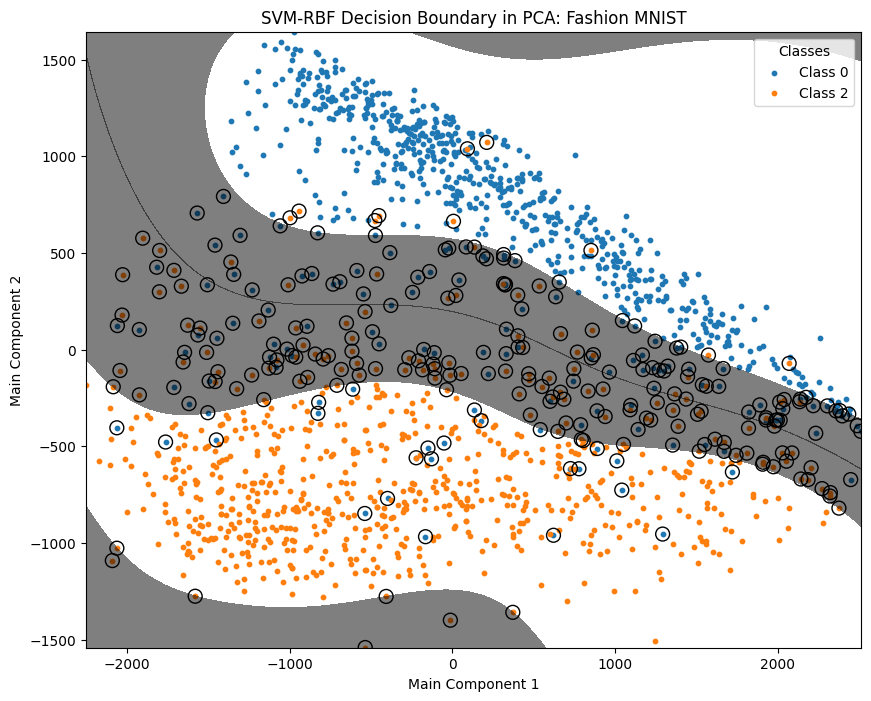

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

unique_classes = set(y_train)
plt.figure(figsize=(10, 8))

for label in unique_classes:
    class_indices = (y_train == label)
    plt.scatter(X_train_pca[class_indices, 0], X_train_pca[class_indices, 1], label=f'Class {label}', s=10)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    model,
    X_train_pca,
    plot_method="contourf",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.xlabel('Main Component 1')
plt.ylabel('Main Component 2')
plt.title('SVM-RBF Decision Boundary in PCA: Fashion MNIST')
plt.legend(title='Classes')
plt.show()

#**Multi-class classification**

The code reads the Fashion MNIST test dataset from the "fashionmnist/fashion-mnist_test.csv" file:

It sets the variable num to 250, indicating the number of samples to be selected for each label.
It initializes empty lists test_dfs and test_index to store the sampled DataFrames and their indices, respectively.
For each label from 0 to 9:

It selects num samples randomly from the dataset corresponding to the current label using sample(n=num, random_state=42).
The selected samples are added to the test_dfs list.
The indices of the selected samples are added to the test_index list.
After iterating through all labels, the code creates the final training and testing DataFrames:

df_train_final is created by dropping the indices in test_index from the original dataset df_data.
df_test_final is created by concatenating the sampled DataFrames stored in test_dfs.
Finally, it prints the shapes of df_train_final and df_test_final to confirm the sizes of the training and testing datasets.

In [ ]:
df_data = pd.read_csv("fashionmnist/fashion-mnist_test.csv")

num = 250

test_dfs = []
test_index = []

for label in range(10):
    # Seleccionar num_samples imágenes de la etiqueta actual
    df_multi = df_data[df_data['label'] == label].sample(n=num, random_state=42)

    # Agregar las muestras seleccionadas al conjunto de prueba
    test_dfs.append(df_multi)

    test_index.extend(df_multi.index)

df_train_final = df_data.drop(test_index)
df_test_final = pd.concat(test_dfs)

print(df_train_final.shape)
print(df_test_final.shape)

(7500, 785)
(2500, 785)


The code prepares the training and testing datasets:

It extracts the features (X_train and X_test) and labels (y_train and y_test) from the final training (df_train_final) and testing (df_test_final) DataFrames.
Then, it initializes a Support Vector Classifier (SVC) model with a linear kernel, regularization parameter C=1.0, polynomial degree degree=2, and decision function shape 'ovr' (one-vs-rest).

The model is trained using the training features and labels (X_train and y_train) with the fit() method.

After training, the model predicts labels for the testing features (X_test) using the predict() method and stores them in y_pred.

Finally, it prints a classification report to evaluate the performance of the model on the testing data.

In [ ]:
# Obtener características (X) y etiquetas (y) del conjunto de entrenamiento
X_train = df_train_final.drop('label', axis=1).values
y_train = df_train_final['label'].values

# Obtener características (X) y etiquetas (y) del conjunto de prueba
X_test = df_test_final.drop('label', axis=1).values
y_test = df_test_final['label'].values

# Inicializar el modelo SVC
model = SVC(kernel='linear', C=1.0, degree=2, decision_function_shape='ovr')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72       250
           1       0.96      0.97      0.97       250
           2       0.64      0.70      0.67       250
           3       0.82      0.79      0.81       250
           4       0.71      0.65      0.68       250
           5       0.87      0.86      0.86       250
           6       0.55      0.52      0.53       250
           7       0.87      0.87      0.87       250
           8       0.95      0.93      0.94       250
           9       0.89      0.92      0.91       250

    accuracy                           0.80      2500
   macro avg       0.80      0.80      0.80      2500
weighted avg       0.80      0.80      0.80      2500



The code extracts features and labels from the final training and testing DataFrames:

It initializes an SVM model with a polynomial kernel, regularization parameter C=10, polynomial degree degree=2, and decision function shape 'ovr' (one-vs-rest).
The model is then trained using the training data, and predictions are made on the testing data. A classification report is printed to evaluate the model's performance on the test set.

In [ ]:
# Obtener características (X) y etiquetas (y) del conjunto de entrenamiento
X_train = df_train_final.drop('label', axis=1).values
y_train = df_train_final['label'].values

# Obtener características (X) y etiquetas (y) del conjunto de prueba
X_test = df_test_final.drop('label', axis=1).values
y_test = df_test_final['label'].values

# Inicializar el modelo SVC
model = SVC(kernel='poly', C=10, degree=2, decision_function_shape='ovr')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       250
           1       0.99      0.96      0.97       250
           2       0.79      0.80      0.79       250
           3       0.86      0.85      0.85       250
           4       0.82      0.76      0.79       250
           5       0.89      0.90      0.90       250
           6       0.68      0.65      0.66       250
           7       0.89      0.93      0.91       250
           8       0.97      0.94      0.95       250
           9       0.94      0.92      0.93       250

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500



The code processes the final training and testing datasets:

It initializes an SVM model with an RBF (Radial Basis Function) kernel, regularization parameter C=10.0, polynomial degree degree=3, and decision function shape 'ovr' (one-vs-rest).
The model is trained using the training data (X_train and y_train). Predictions are made on the testing data (X_test), and a classification report is printed to evaluate the model's performance.

In [ ]:
# Obtener características (X) y etiquetas (y) del conjunto de entrenamiento
X_train = df_train_final.drop('label', axis=1).values
y_train = df_train_final['label'].values

# Obtener características (X) y etiquetas (y) del conjunto de prueba
X_test = df_test_final.drop('label', axis=1).values
y_test = df_test_final['label'].values

# Inicializar el modelo SVC
model = SVC(kernel='rbf', C=10.0, degree=3, decision_function_shape='ovr')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       250
           1       1.00      0.97      0.98       250
           2       0.82      0.82      0.82       250
           3       0.89      0.87      0.88       250
           4       0.83      0.82      0.83       250
           5       0.94      0.92      0.93       250
           6       0.71      0.70      0.70       250
           7       0.93      0.94      0.93       250
           8       0.96      0.95      0.96       250
           9       0.94      0.95      0.95       250

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.88      0.88      0.88      2500



The code processes the dataset to visualize it using PCA (Principal Component Analysis):

The labels (y) and features (X) are separated from the DataFrame.
PCA is applied to reduce the dimensionality of the features to two principal components.
A unique color map is generated for each class to distinguish them visually.
Scatter plot is created to visualize the data points in the reduced two-dimensional space (X_pca).

<ipython-input-16-9d462659f408>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', num_classes)


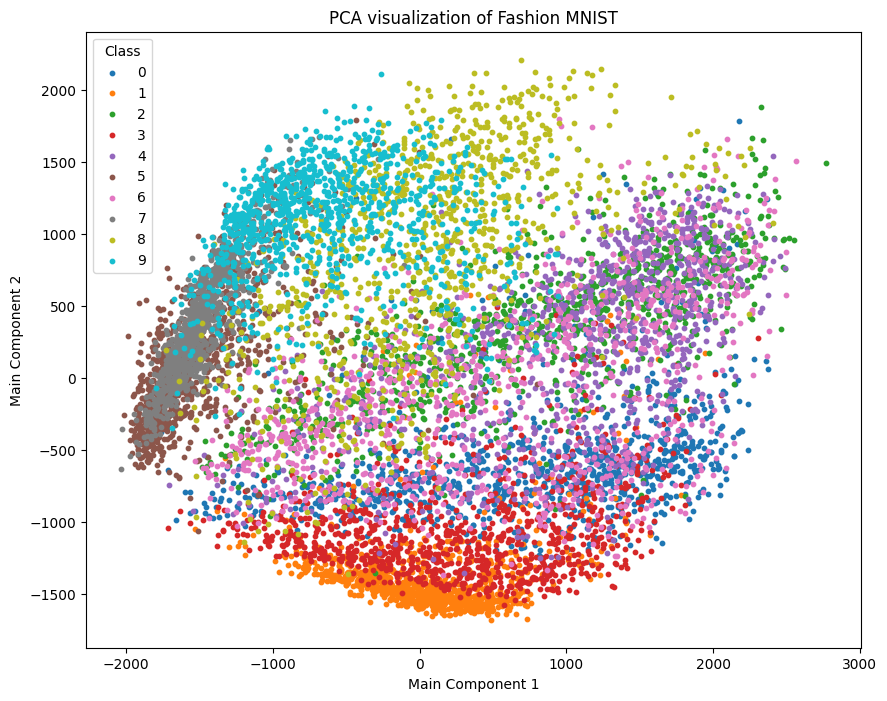

In [ ]:
# Separar las etiquetas (labels) de las características (features)
y = df['label'].values
X = df.drop('label', axis=1).values  # Utiliza drop() para eliminar la columna de etiquetas y obtener solo las características

# Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Generar una lista de colores única para cada clase
num_classes = len(set(y))
color_map = plt.cm.get_cmap('tab10', num_classes)

# Crear el diagrama de dispersión con colores únicos para todas las clases
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color_map(i), label=str(i), s=10)

plt.title('PCA visualization of Fashion MNIST')
plt.xlabel('Main Component 1')
plt.ylabel('Main Component 2')
plt.legend(title='Class')
plt.show()

The code processes the training and testing datasets with PCA and trains an SVM model on the transformed data:

Features (X_train and X_test) and labels (y_train and y_test) are extracted from the final training and testing DataFrames.
PCA is applied to reduce the dimensionality of the features to two principal components for both training and testing data.
An SVM model with a polynomial kernel, regularization parameter C=1.0, polynomial degree degree=3, and decision function shape 'ovr' (one-vs-rest) is initialized and trained using the PCA-transformed training data (X_train_pca and y_train).
Predictions are made on the PCA-transformed testing data (X_test_pca), and a classification report is printed to evaluate the model's performance.

In [ ]:
# Obtener características (X) y etiquetas (y) del conjunto de entrenamiento
X_train = df_train_final.drop('label', axis=1).values
y_train = df_train_final['label'].values

# Obtener características (X) y etiquetas (y) del conjunto de prueba
X_test = df_test_final.drop('label', axis=1).values
y_test = df_test_final['label'].values

#Inicializar y ajustar PCA en los datos de entrenamiento
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenar el modelo SVC con los datos transformados por PCA
model = SVC(kernel='poly', C=1.0, degree=3, decision_function_shape='ovr')
model.fit(X_train_pca, y_train)

# Predecir las etiquetas utilizando los datos de prueba transformados por PCA
y_pred = model.predict(X_test_pca)

# Imprimir el informe de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.54      0.52       250
           1       0.81      0.82      0.82       250
           2       0.37      0.38      0.38       250
           3       0.64      0.54      0.59       250
           4       0.50      0.05      0.09       250
           5       0.60      0.51      0.55       250
           6       0.22      0.52      0.31       250
           7       0.59      0.66      0.62       250
           8       0.64      0.52      0.57       250
           9       0.68      0.54      0.60       250

    accuracy                           0.51      2500
   macro avg       0.56      0.51      0.51      2500
weighted avg       0.56      0.51      0.51      2500



The code processes the training and testing datasets using PCA and trains an SVM model with an RBF kernel on the transformed data:

PCA is applied to reduce the dimensionality of the features to two principal components for both training and testing data.
An SVM model with an RBF kernel, regularization parameter C=10.0, polynomial degree degree=3, and decision function shape 'ovr' (one-vs-rest) is initialized and trained using the PCA-transformed training data.
Predictions are made on the PCA-transformed testing data, and a classification report is printed to evaluate the model's performance.

In [ ]:
# Obtener características (X) y etiquetas (y) del conjunto de entrenamiento
X_train = df_train_final.drop('label', axis=1).values
y_train = df_train_final['label'].values

# Obtener características (X) y etiquetas (y) del conjunto de prueba
X_test = df_test_final.drop('label', axis=1).values
y_test = df_test_final['label'].values

#Inicializar y ajustar PCA en los datos de entrenamiento
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenar el modelo SVC con los datos transformados por PCA
model = SVC(kernel='rbf', C=10.0, degree=3, decision_function_shape='ovr')
model.fit(X_train_pca, y_train)

# Predecir las etiquetas utilizando los datos de prueba transformados por PCA
y_pred = model.predict(X_test_pca)

# Imprimir el informe de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.76      0.60       250
           1       0.85      0.80      0.82       250
           2       0.40      0.36      0.38       250
           3       0.64      0.59      0.62       250
           4       0.42      0.50      0.46       250
           5       0.64      0.50      0.56       250
           6       0.33      0.21      0.25       250
           7       0.60      0.76      0.67       250
           8       0.59      0.62      0.60       250
           9       0.71      0.56      0.63       250

    accuracy                           0.56      2500
   macro avg       0.57      0.56      0.56      2500
weighted avg       0.57      0.56      0.56      2500



#**Clothing-Dataset-Small**

We're going to use the previous practice to apply the SVM method.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

In [ ]:
# Path to the folder containing the main folder 'images'
main_folder_path = '/content/drive/MyDrive/Practica2/images_28'

# List the subfolders inside the 'images' folder
subfolders = ['hats', 'pants', 'shirt', 'shoes']

NUMBER_CLASSES = 4 #aquí
images = [] #aquí

# Iterate through each subfolder
for subfolder in subfolders:
    # Path to the subfolder
    folder_path = os.path.join(main_folder_path, subfolder)

    # List files in the subfolder
    files = os.listdir(folder_path)

    # Iterate through each file in the subfolder
    for file in files:
        file_path = os.path.join(folder_path, file)

        original_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

        images.append(original_image)

images = np.array(images)
labels = np.repeat(np.arange(NUMBER_CLASSES), len(images) / NUMBER_CLASSES)

In [ ]:
def raw_pixels(img):
    """Return raw pixels as feature from the image"""
    return img.flatten()

# Compute the descriptors for all the images.
# In this case, the raw pixels are the feature descriptors
raw_descriptors = []
for img in images:
    raw_descriptors.append(np.float32(raw_pixels(img)))
raw_descriptors = np.squeeze(raw_descriptors)

In [ ]:
total_hat = np.arange(0,1275)
train_hat = np.random.choice(range(0,1275), 765, replace=False)
temp = np.setdiff1d(total_hat, train_hat)
test_hat = np.random.choice(temp, 255, replace=False)
val_hat = np.setdiff1d(temp, test_hat)

total_pants = np.arange(1275,2550)
train_pants = np.random.choice(range(1275,2550), 765, replace=False)
temp = np.setdiff1d(total_pants, train_pants)
test_pants = np.random.choice(temp, 255, replace=False)
val_pants = np.setdiff1d(temp, test_pants)

total_shirt = np.arange(2550,3825)
train_shirt = np.random.choice(range(2550,3825), 765, replace=False)
temp = np.setdiff1d(total_shirt, train_shirt)
test_shirt = np.random.choice(temp, 255, replace=False)
val_shirt = np.setdiff1d(temp, test_shirt)

total_shoes = np.arange(3825,5100)
train_shoes = np.random.choice(range(3825,5100), 765, replace=False)
temp = np.setdiff1d(total_shoes, train_shoes)
test_shoes = np.random.choice(temp, 255, replace=False)
val_shoes = np.setdiff1d(temp, test_shoes)

train_numbers = np.concatenate((train_hat, train_pants), axis=None)
train_numbers = np.concatenate((train_numbers, train_shirt), axis=None)
train_numbers = np.concatenate((train_numbers, train_shoes), axis=None)

test_numbers = np.concatenate((test_hat, test_pants), axis=None)
test_numbers = np.concatenate((test_numbers, test_shirt), axis=None)
test_numbers = np.concatenate((test_numbers, test_shoes), axis=None)

val_numbers = np.concatenate((val_hat, val_pants), axis=None)
val_numbers = np.concatenate((val_numbers, val_shirt), axis=None)
val_numbers = np.concatenate((val_numbers, val_shoes), axis=None)

raw_descriptors_train = raw_descriptors[train_numbers]
raw_descriptors_test = raw_descriptors[test_numbers]
raw_descriptors_val = raw_descriptors[val_numbers]

labels_train = labels[train_numbers]
labels_test = labels[test_numbers]
labels_val = labels[val_numbers]

In [ ]:
print(raw_descriptors_train.shape)

(3060, 784)


We've set up the training and testing datasets with the descriptors and labels:

Initialized an SVM model with a linear kernel, regularization parameter C=1.0, polynomial degree degree=2, and decision function shape 'ovr' (one-vs-rest).
Trained the model on the training data.
Predicted labels for the testing data using the trained model.
Printed a classification report to evaluate the model's performance on the testing data.

In [ ]:
train_X = raw_descriptors_train
train_y = labels_train
test_X = raw_descriptors_test
test_y = labels_test

# Inicializar y entrenar el modelo SVM
model = SVC(kernel='linear', C=1.0, degree=2, decision_function_shape='ovr')
model.fit(train_X, train_y)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(test_X)

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.64      0.57       255
           1       0.69      0.71      0.70       255
           2       0.63      0.60      0.61       255
           3       0.64      0.49      0.56       255

    accuracy                           0.61      1020
   macro avg       0.62      0.61      0.61      1020
weighted avg       0.62      0.61      0.61      1020



We've configured the SVM model with a polynomial kernel and trained it using the training data. Then, we predicted labels for the testing data and printed a classification report to assess the model's performance.

In [ ]:
train_X = raw_descriptors_train
train_y = labels_train
test_X = raw_descriptors_test
test_y = labels_test

# Inicializar y entrenar el modelo SVM
model = SVC(kernel='poly', C=0.5, degree=3, decision_function_shape='ovr')
model.fit(train_X, train_y)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(test_X)

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.84      0.67       255
           1       0.86      0.77      0.81       255
           2       0.80      0.66      0.72       255
           3       0.81      0.65      0.72       255

    accuracy                           0.73      1020
   macro avg       0.76      0.73      0.73      1020
weighted avg       0.76      0.73      0.73      1020



We've prepared and trained the SVM model with an RBF kernel. After making predictions on the testing data, we printed a classification report to assess its performance.

In [ ]:
train_X = raw_descriptors_train
train_y = labels_train
test_X = raw_descriptors_test
test_y = labels_test

# Inicializar y entrenar el modelo SVM
model = SVC(kernel='rbf', C=1.0, degree=3, decision_function_shape='ovr')
model.fit(train_X, train_y)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(test_X)

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       255
           1       0.87      0.81      0.84       255
           2       0.74      0.77      0.75       255
           3       0.73      0.73      0.73       255

    accuracy                           0.76      1020
   macro avg       0.77      0.76      0.76      1020
weighted avg       0.77      0.76      0.76      1020



# REFERENCIAS

1. Diplomado Big Data & Machine Learning UdeA. (s.f.). Curso1.GitHub. https://github.com/diplomado-bigdata-machinelearning-udea/Curso1/blob/master/s01/s01.ipynb

2. Scikit-learn. (s.f.). Support Vector Machines. https://scikit-learn.org/stable/modules/svm.html

3. Ciencia de Datos. (s.f.). PCA: Principal Component Analysis con Python. https://cienciadedatos.net/documentos/py19-pca-python

4. Khan Academy en Español. (2015, Agosto 3). Concepto de PCA (Principal Component Analysis) [Video]. https://www.youtube.com/watch?v=FgakZw6K1QQ